<a href="https://colab.research.google.com/github/amirmohammadkalateh/optimizers_ANN/blob/main/RMSProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

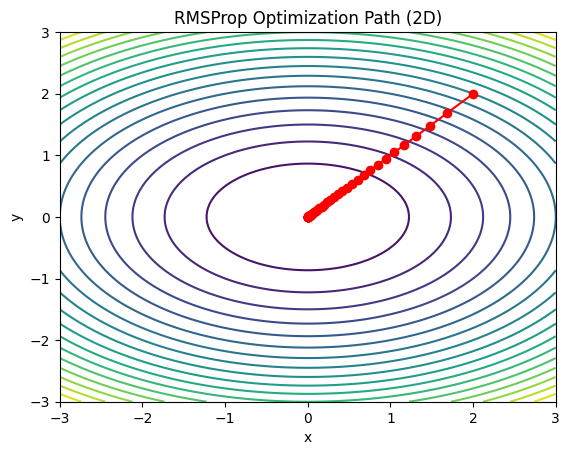

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_function(x, y):
    return x**2 + 2*y**2

def rms_prop(x_init, y_init, learning_rate, beta, num_iterations):
    x, y = x_init, y_init
    v_x, v_y = 0, 0
    path_x, path_y = [x], [y]

    for _ in range(num_iterations):
        # Calculate gradients
        grad_x = 2 * x
        grad_y = 4 * y

        # Update v_x and v_y
        v_x = beta * v_x + (1 - beta) * grad_x**2
        v_y = beta * v_y + (1 - beta) * grad_y**2

        # Update x and y
        x -= learning_rate * grad_x / (np.sqrt(v_x) + 1e-8)
        y -= learning_rate * grad_y / (np.sqrt(v_y) + 1e-8)

        path_x.append(x)
        path_y.append(y)

    return path_x, path_y

# Parameters
x_init, y_init = 2, 2
learning_rate = 0.1
beta = 0.9
num_iterations = 50

# Run RMSProp
path_x, path_y = rms_prop(x_init, y_init, learning_rate, beta, num_iterations)

# Plot the function and the optimization path
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic_function(X, Y)

plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(path_x, path_y, 'r-o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RMSProp Optimization Path (2D)')
plt.show()

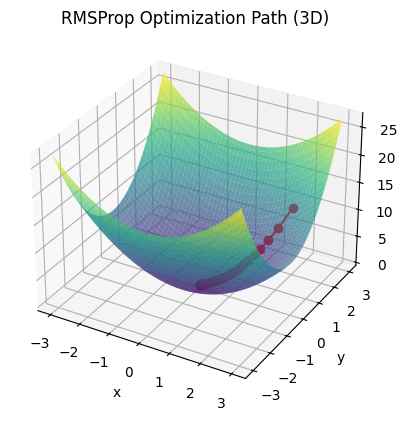

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# (RMSProp and quadratic_function definitions remain the same)

# Parameters
x_init, y_init = 2, 2
learning_rate = 0.1
beta = 0.9
num_iterations = 50

# Run RMSProp
path_x, path_y = rms_prop(x_init, y_init, learning_rate, beta, num_iterations)
path_z = quadratic_function(np.array(path_x), np.array(path_y))

# Plot the function and the optimization path
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic_function(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.plot(path_x, path_y, path_z, 'r-o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('RMSProp Optimization Path (3D)')
plt.show()